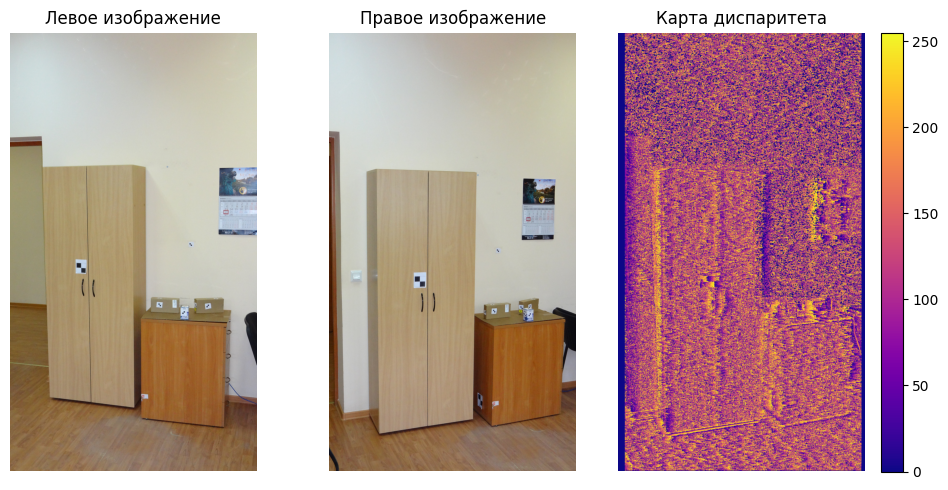

In [7]:
import cv2
import sys
import numpy as np

def get_disparity(img_left, img_right, method="BM"):
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    
    h, w = gray_left.shape
    
    if method == "BM":
        sbm = cv2.StereoBM_create(numDisparities=112, blockSize=9)
        sbm.setPreFilterType(1)
        sbm.setPreFilterSize(5)
        sbm.setPreFilterCap(61)
        sbm.setMinDisparity(-39)
        sbm.setTextureThreshold(507)
        sbm.setUniquenessRatio(0)
        sbm.setSpeckleRange(8)
        sbm.setSpeckleWindowSize(0)

        disparity = sbm.compute(gray_left, gray_right).astype(np.float32) / 16.0
        
        disparity_visual = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    elif method == "SGBM":
        sbm = cv2.StereoSGBM_create(minDisparity=-21,
                                   numDisparities=96,
                                   blockSize=9,
                                   P1=8*3*9**2,
                                   P2=32*3*9**2,
                                   disp12MaxDiff=1,
                                   uniquenessRatio=7,
                                   speckleWindowSize=0,
                                   speckleRange=8,
                                   preFilterCap=63,
                                   mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY)

        disparity = sbm.compute(gray_left, gray_right).astype(np.float32) / 16.0
        
        disparity_visual = cv2.normalize(disparity, None, alpha=0, beta=250, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return disparity_visual

img_left = cv2.imread('shelf_1.jpg')
img_right = cv2.imread('shelf_2.jpg')

disparity = get_disparity(img_left, img_right, method)

img_left_rgb = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
img_right_rgb = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Левое изображение")
plt.imshow(img_left_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Правое изображение")
plt.imshow(img_right_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Карта диспаритета")
plt.imshow(disparity, cmap='plasma')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()